In [11]:
# ============================================================
# Beispiel 4: Entscheidungsbaum zur Blutspende-Vorhersage
# ============================================================
# Ziel:
# Aufbau und Evaluation eines Decision-Tree-Klassifikators
# anhand eines Datensatzes zur Blutspende.
# ============================================================

In [13]:
# ----------------------------
# Benötigte Bibliotheken
# ----------------------------

import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [15]:
# ----------------------------
# Daten laden
# ----------------------------
# Der Datensatz enthält Informationen über Blutspender
# sowie ein Label, ob im März 2007 gespendet wurde.

transfusion_df=pd.read_csv("data/blood_donation.csv")

# Erste Zeilen anzeigen (nur zur Kontrolle / Exploration)
transfusion_df.head()

,Recency_month,Frequency_times,Monetary_blood,Time_months,donated_march2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [17]:
# ----------------------------
# Aufteilen in Features und Labels
# ----------------------------

# Features: alle erklärenden Variablen
Features = transfusion_df.loc[:, 'Recency_month':'Time_months']

# Label: Zielvariable (0 = keine Spende, 1 = Spende)
Labels = transfusion_df['donated_march2007']

# ----------------------------
# Trainings- und Testdaten erzeugen
# ----------------------------
# 70 % Training, 30 % Test
# random_state sorgt für Reproduzierbarkeit
X_train, X_test, y_train, y_test = train_test_split(Features,Labels,test_size=0.3, random_state=42)

In [19]:
# ----------------------------
# Entscheidungsbaum konfigurieren und trainieren
# ----------------------------

clf = DecisionTreeClassifier(max_depth=4,min_samples_split=50,min_samples_leaf=60,criterion="entropy")
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=60,
                       min_samples_split=50)

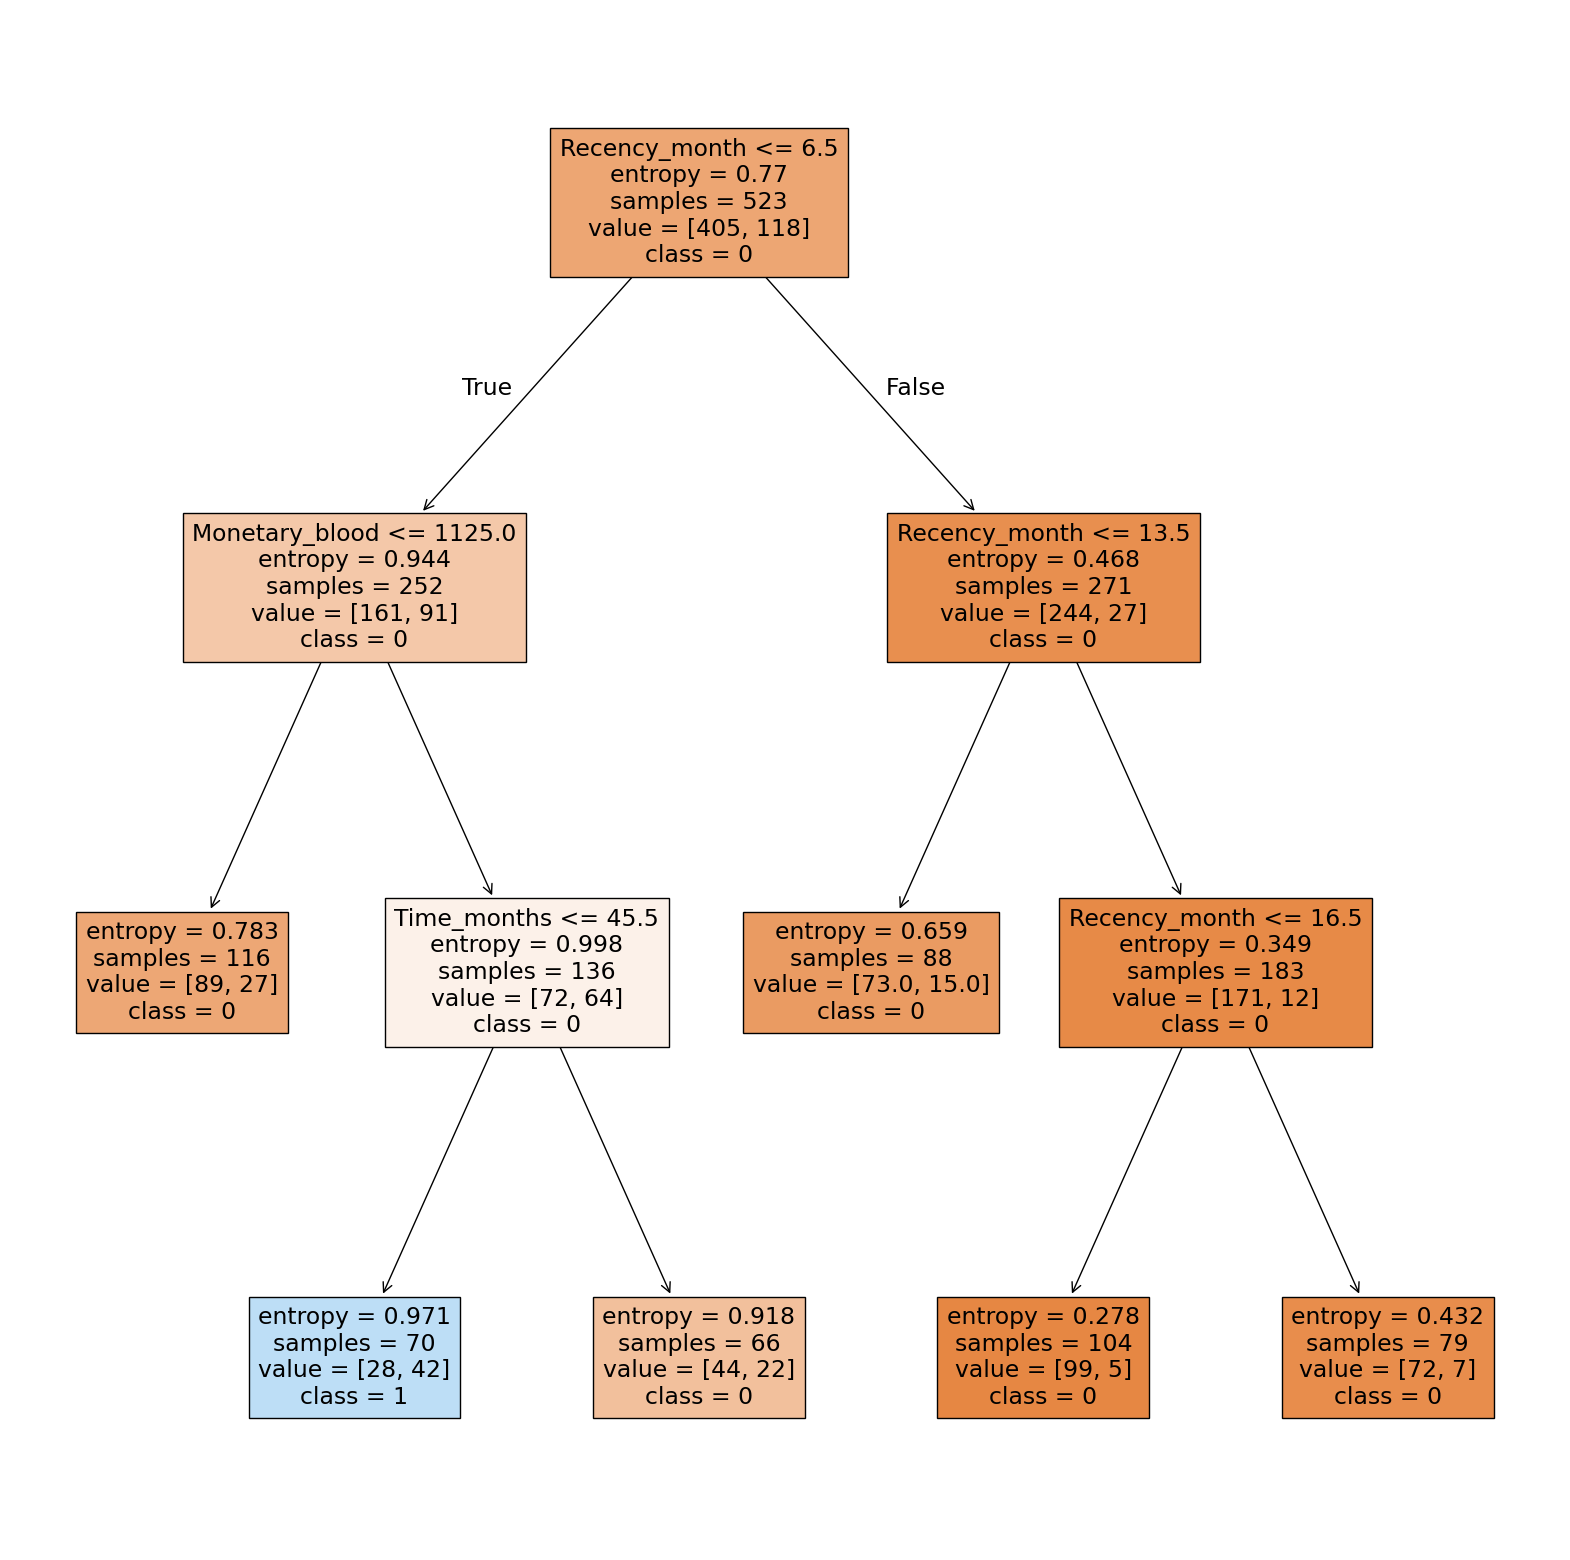

In [21]:
# ----------------------------
# Entscheidungsbaum visualisieren
# ----------------------------
plt.figure(figsize=(20, 20)) 
plot_tree(clf, filled=True, feature_names=Features.columns, class_names=["0", "1"])
plt.show()

In [23]:
# ----------------------------
# Klassifizieren und Genauigkeit
# ----------------------------
y_pred = clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.7822222222222223
